VED KHEDKAR


In [60]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt

In [61]:
df= pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [62]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


                        0          1
Intercept      -89.414264 -65.977999
np.log(Salary)   6.380675   8.476968


Text(0, 0.5, 'YearsExperience')

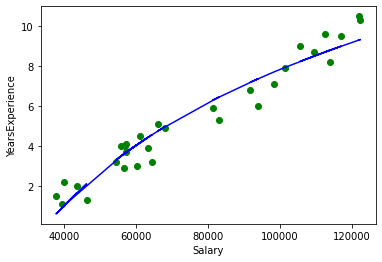

In [63]:
# Transforming variables for accuracy
import statsmodels.formula.api as smf
model1=smf.ols("YearsExperience~np.log(Salary)",data=df).fit()
model1.params
model1.summary()
print(model1.conf_int(0.01)) # 99% confidence level
pred1 = model1.predict(pd.DataFrame(df['Salary']))
#pred1.corr(wcat.AT)
# pred2 = model2.predict(wcat.iloc[:,0])
#pred2
plt.scatter(x=df['Salary'],y=df['YearsExperience'],color='green');plt.plot(df['Salary'],pred1,color='blue');plt.xlabel('Salary');plt.ylabel('YearsExperience')


                  0         1
Intercept -0.460735  0.272322
Salary     0.000016  0.000026


Text(0, 0.5, 'YearsExperience')

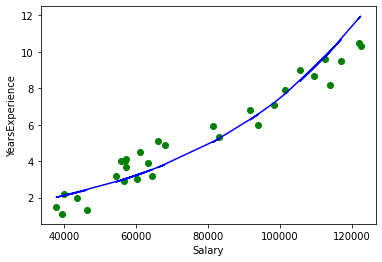

In [64]:
# Exponential transformation
import statsmodels.formula.api as smf
model2=smf.ols("np.log(YearsExperience)~Salary",data=df).fit()
model2.params
model2.summary()
print(model2.conf_int(0.01)) # 99% confidence level
pred_log = model2.predict(pd.DataFrame(df['Salary']))
pred_log
pred2=np.exp(pred_log)  # as we have used log(AT) in preparing model so we need to convert it back
pred2
pred2.corr(df.YearsExperience)
plt.scatter(x=df['Salary'],y=df['YearsExperience'],color='green');plt.plot(df.Salary,np.exp(pred_log),color='blue');plt.xlabel('Salary');plt.ylabel('YearsExperience')

In [65]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state =0)

In [67]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

LinearRegression()

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


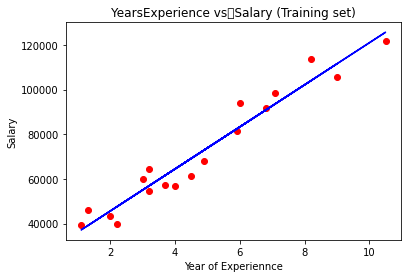

In [57]:
plt.scatter(X_train, y_train,color= 'red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('YearsExperience vs	Salary (Training set)')
plt.xlabel('Year of Experiennce')
plt.ylabel('Salary')
plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


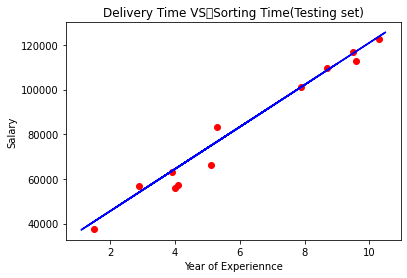

In [58]:
plt.scatter(X_test, y_test,color= 'red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('Delivery Time VS	Sorting Time(Testing set)')
plt.xlabel('Year of Experiennce')
plt.ylabel('Salary')
plt.show()

In [59]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
r2_score = regressor.score(X_test,y_test)
print(r2_score*100,'%')

96.79117063698979 %
